# KNN - K-nearest neighbors

- KNN - Regressão.

<img src="https://www.researchgate.net/profile/Mohammed-Badawy/publication/331424423/figure/fig1/AS:732056359297024@1551547245072/Example-on-KNN-classifier.png" width=600>

###  

## KNN como Regressão

Podemos aplicar da mesma forma que em Árvores de Regressão, para o modelo de __KNN__, temos uma versão com __Regressão__:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.dropna(inplace=True)
df.shape

(333, 7)

E as outras categóricas?

In [6]:
df['species'].value_counts(normalize=True)

Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: species, dtype: float64

In [7]:
df['island'].value_counts(normalize=True)

Biscoe       0.489489
Dream        0.369369
Torgersen    0.141141
Name: island, dtype: float64

In [8]:
df['sex'] = np.where(df['sex'] == 'Female', 1, 0)

In [9]:
df_dummies = pd.get_dummies(df, columns=['species', 'island'], drop_first=True)

In [11]:
df_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,1
5,39.3,20.6,190.0,3650.0,0,0,0,0,1


In [12]:
X = df_dummies.drop(columns=['body_mass_g'])
y = df_dummies['body_mass_g']

# Sim, treino, validação e teste  
https://machinelearningmastery.com/difference-test-validation-datasets/

---
### Exemplo

In [13]:
import numpy as np

In [14]:
numeros = np.linspace(1, 100, 100)

In [15]:
train_size = 0.6
val_size = 0.3
test_size = round(1 - train_size - val_size, 1)
test_size

0.1

In [16]:
# 100 >>> train=60, val=30 e test=10

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_val_test = train_test_split(numeros, train_size=train_size)

print(len(X_train), len(X_val_test))

60 40


In [19]:
razao_val_test = round(val_size / (val_size + test_size), 2)
razao_val_test

0.75

In [20]:
40*0.75

30.0

In [21]:
X_val, X_test = train_test_split(X_val_test, train_size=razao_val_test)

In [22]:
print(len(X_val), len(X_test))

30 10


-----

In [23]:
def split_train_validation_test(X, y, train_size=0.7, val_size=0.2):
    test_size = round((1 - train_size - val_size), 1)

    razao_val_test = round(val_size / (val_size + test_size), 2)
    
    X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=train_size)
    
    X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=razao_val_test)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [24]:
X_train, X_val, X_test, y_train, y_val, y_test = split_train_validation_test(X, y, train_size=0.7, val_size=0.2)

In [25]:
len(X_train)

233

In [26]:
len(X_val)

67

In [27]:
len(X_test)

33

Vamos usar o conceito de split com scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

<img src=" 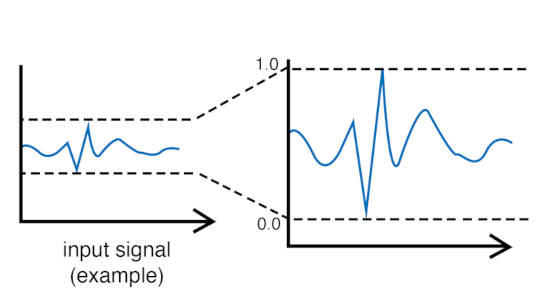" >

In [29]:
data = [[0, 0], [1, 50], [2, 100]]

scaler = MinMaxScaler()

In [30]:
scaler.fit(data)

MinMaxScaler()

In [31]:
print(scaler.data_min_, scaler.data_max_)

[0. 0.] [  2. 100.]


In [32]:
scaler.transform(data)

array([[0. , 0. ],
       [0.5, 0.5],
       [1. , 1. ]])

In [33]:
scaler.transform([[0.5, 75]])

array([[0.25, 0.75]])

E se eu usar fit_transform?

In [34]:
scaler1 = MinMaxScaler()

In [35]:
scaler1.fit_transform(data)

array([[0. , 0. ],
       [0.5, 0.5],
       [1. , 1. ]])

In [36]:
scaler1.data_min_

array([0., 0.])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [39]:
X_train_sc = MinMaxScaler().fit_transform(X_train)
X_test_sc = MinMaxScaler().fit_transform(X_test)

In [40]:
# Framework basico
from sklearn.metrics import r2_score

estimador = KNeighborsRegressor()
estimador.fit(X_train_sc, y_train)

y_pred = estimador.predict(X_test_sc)

r2_score(y_test, y_pred)

0.8477295831798262

In [42]:
# for numero_vizinho in lista_variacoes_numeros_vizinhos: # escolha_k()
#     for numero_k in lista_variacoes_tamanho_kold: # Kuma chutou
#         for qtde_observacoes in variacoes_numero_observacoes_no_treino: # linear curve
#             for quais_feature in variacoes_combinacao_features:

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

def escolha_k(k_list, X_train, y_train):
    training_error = []
    validation_error = []

    for k in k_list:
        kf = KFold(n_splits=15)

        estimador = KNeighborsRegressor(n_neighbors=k)

        cv_scores = cross_validate(estimator=estimador, X=X_train, y=y_train,
                                   scoring='neg_mean_absolute_error',
                                    cv=kf, return_train_score=True)
        
        training_error.append(-1*np.mean(cv_scores['train_score']))
        validation_error.append(-1*np.mean(cv_scores['test_score']))
        
        
    plt.plot(k_list, training_error)
    plt.plot(k_list, validation_error)
    
    plt.title('Erros de treino e validação em função de K')
    plt.ylabel('Erro médio absoluto')
    plt.xlabel('K')
    plt.legend(['Treinamento', 'Validação'])

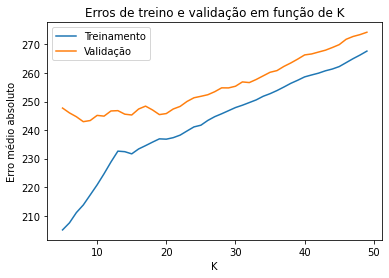

In [44]:
escolha_k(range(5, 50), X_train_sc, y_train)

E a quantidade de dados no train?

In [45]:
from sklearn.model_selection import learning_curve

In [46]:
estimador = KNeighborsRegressor(n_neighbors=22)

In [47]:
np.linspace(0.3, 1, 10) * len(X_train)

array([ 69.9       ,  88.02222222, 106.14444444, 124.26666667,
       142.38888889, 160.51111111, 178.63333333, 196.75555556,
       214.87777778, 233.        ])

In [48]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=estimador,
    X=X_train_sc,
    y=y_train,
    train_sizes=np.linspace(0.3, 1, 10),
    scoring='neg_mean_absolute_error',
    cv=15
)

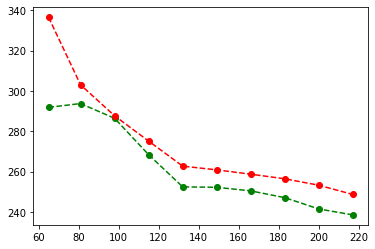

In [52]:
plt.plot(train_sizes, -train_scores.mean(1), '--o', color='g')
plt.plot(train_sizes, -test_scores.mean(1), '--o', color='r')

plt.show()


In [53]:
X_train.shape[0]

233

In [54]:
140 / 233

0.6008583690987125

In [55]:
140 / (233 - (232*0.2)) 

0.7502679528403001

Enfim...

In [87]:
estimador = KNeighborsRegressor(n_neighbors=22)
train_size = 0.75

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

In [89]:
X_train.shape

(249, 8)

In [90]:
X_train_sc = MinMaxScaler().fit_transform(X_train)
X_test_sc = MinMaxScaler().fit_transform(X_test)

In [91]:
estimador.fit(X_train_sc, y_train)

KNeighborsRegressor(n_neighbors=22)

In [92]:
y_pred = estimador.predict(X_test_sc)

In [93]:
r2_score(y_test, y_pred)

0.8739419601390669

Como ele faz o cáculo?

https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py